[0.34556085465881886, 0.3276370661073896, 0.2989665944839774, 0.3096970774633715, -0.00462502098703631, 0.3102024033085852, 0.22266101818605805, 0.31104213440130923]


<Figure size 640x480 with 0 Axes>

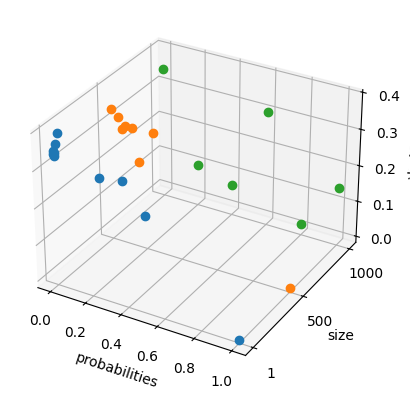

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
ax = plt.figure().add_subplot(111,projection='3d')

c_list = []
colors = ('r', 'g', 'b', 'k')

p_500=[0, 0.00025, 0.0004, 0.0005, 0.00625, 0.00075, 0.001, 0.0015]
beta_500=[0.34556085465881886, 0.3276370661073896, 0.2989665944839774, 0.3096970774633715, -0.00462502098703631, 0.3102024033085852, 0.22266101818605805, 0.31104213440130923]
alpha_500=[0.50423229 ,0.62511891 ,0.70304121 ,0.64321055 , 0.46201471 ,0.63030955,0.5995291, 0.60051276 ]

p_1000=[0, 1e-05, 2e-05, 3e-05, 4e-05, 5e-05]
beta_1000=[0.34556085465881886, 0.09761253582555589, 0.06904401372192766, 0.300819074111096, 0.012779626764001488, 0.14541629646376542]
alpha_1000=[ 0.50423229,0.70598515, 0.68625507, 0.64743809,0.67029626 ,0.67063507] 

p_1=[0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2, 0.4]
beta_1=[0.346812482109704, 0.34082460892932853, 0.34406869430504544, 0.33391273563027796, 0.36824854483832786, 0.398550081018931, 0.31072962051446407, 0.3205339698568981, 0.24754186307873965, -0.008982286211325406]
alpha_1=[0.5168022755774675, 0.44638487810752686, 0.4780856714829171, 0.5002654064152032, 0.4741653692016427, 0.4323945681420591, 0.4948588856394455, 0.5739448491260996, 0.5830232130565081, 0.15446750868751188]


p=[p_1,p_500,p_1000]
beta=[beta_1,beta_500,beta_1000]


print(beta[1])

for y in list(range(0,3)):
        
    ax.plot((p[y])/np.max(p[y]),beta[y],y,zdir="y",marker='o',linestyle='')



plt.xlabel('probabilities')
plt.ylabel('size')
ax.set_zlabel(r"\beta")
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['1', '500', '1000'])
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# =============================================
# Data
# =============================================
p_500=[0, 0.00025, 0.0004, 0.0005, 0.00625, 0.00075, 0.001, 0.0015]
beta_500=[0.34556085465881886, 0.3276370661073896, 0.2989665944839774,
          0.3096970774633715, -0.00462502098703631, 0.3102024033085852,
          0.22266101818605805, 0.31104213440130923]

p_1000=[0, 1e-05, 2e-05, 3e-05, 4e-05, 5e-05]
beta_1000=[0.34556085465881886, 0.09761253582555589, 0.06904401372192766,
           0.300819074111096, 0.012779626764001488, 0.14541629646376542]

p_1=[0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2, 0.4]
beta_1=[0.346812482109704, 0.34082460892932853, 0.34406869430504544, 
        0.33391273563027796, 0.36824854483832786, 0.398550081018931,
        0.31072962051446407, 0.3205339698568981, 0.24754186307873965,
        -0.008982286211325406]

p = [p_1, p_500, p_1000]
beta = [beta_1, beta_500, beta_1000]
names = ['1', '500', '1000']

# =============================================
# Build interactive plot
# =============================================
fig = go.Figure()

for idx in range(3):
    x = np.array(p[idx])*int(names[idx])
    y = [idx] * len(x)
    z = beta[idx]

    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        name=f"Size {names[idx]}",
        marker=dict(size=4),
        line=dict(width=4)
    ))

# =============================================
# Add transparent highlight box for β ∈ [0.28, 0.38]
# =============================================

# Box corners
x_min, x_max = 0, 3     # normalized probabilities span
y_min, y_max = 0, 2     # covers all curves (0→1→2)
z_min, z_max = 0.28, 0.38

# 8 vertices of the cuboid
X = [x_min, x_max, x_max, x_min, x_min, x_max, x_max, x_min]
Y = [y_min, y_min, y_max, y_max, y_min, y_min, y_max, y_max]
Z = [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max]

fig.add_trace(go.Mesh3d(
    x=X, y=Y, z=Z,
    opacity=0.25,           # transparent
    color='yellow',         # highlight color
    flatshading=False,
    name='β range 0.28–0.38',
    showscale=False,
    alphahull=0
))

# =============================================
# Axis labels and formatting
# =============================================

fig.update_layout(
    scene=dict(
        xaxis_title='probabilities (normalized)',
        yaxis_title='array',
        zaxis_title='beta value',
        yaxis=dict(
            tickmode='array',
            tickvals=[0, 1, 2],
            ticktext=['1', '500', '1000']
        )
    ),
    width=900,
    height=700,
    title='Interactive 3D Plot with β Highlight Box'
)

fig.show()
